In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json
import pandas as pd
from scipy import stats
import os

#with open('transfer_experiment.json', 'r') as fp:
#    data = json.load(fp)
    
def load_data(experiments):
    data = { 'results' : {} }
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        if os.path.isfile('experiments/' + experiment_title + '/' + experiment_title + '.json'):
            with open('experiments/' + experiment_title + '/' + experiment_title + '.json', 'r') as fp:
                results = json.load(fp)
                data['results'][experiment_title] = results
    return data

In [2]:
experiments = [
            {'id': '1', 'source':'imdb', 'target':'uwcse', 'predicate':'workedunder', 'to_predicate':'advisedby'},
            {'id': '2', 'source':'uwcse', 'target':'imdb', 'predicate':'advisedby', 'to_predicate':'workedunder'},
            {'id': '3', 'source':'imdb', 'target':'uwcse', 'predicate':'movie', 'to_predicate':'publication'},
            {'id': '4', 'source':'uwcse', 'target':'imdb', 'predicate':'publication', 'to_predicate':'movie'},
            {'id': '5', 'source':'imdb', 'target':'uwcse', 'predicate':'genre', 'to_predicate':'inphase'},
            {'id': '6', 'source':'uwcse', 'target':'imdb', 'predicate':'inphase', 'to_predicate':'genre'},
            {'id': '7', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samevenue'},
            {'id': '8', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samebib'},
            {'id': '9', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'sameauthor'},
            {'id': '10', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'sametitle'},
            {'id': '11', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samevenue'},
            {'id': '12', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samebib'},
            {'id': '13', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'sameauthor'},
            {'id': '14', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'sametitle'},
            {'id': '15', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype'},
            {'id': '16', 'source':'yeast', 'target':'twitter', 'predicate':'interaction', 'to_predicate':'follows'},
            {'id': '17', 'source':'yeast', 'target':'twitter', 'predicate':'location', 'to_predicate':'tweets'},
            {'id': '18', 'source':'yeast', 'target':'twitter', 'predicate':'enzyme', 'to_predicate':'tweets'},
            {'id': '19', 'source':'yeast', 'target':'twitter', 'predicate':'function', 'to_predicate':'tweets'},
            {'id': '20', 'source':'yeast', 'target':'twitter', 'predicate':'phenotype', 'to_predicate':'tweets'},
            {'id': '21', 'source':'yeast', 'target':'twitter', 'predicate':'complex', 'to_predicate':'tweets'},
            {'id': '22', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass'},
            {'id': '23', 'source':'twitter', 'target':'yeast', 'predicate':'follows', 'to_predicate':'interaction'},
            {'id': '24', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'location'},
            {'id': '25', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'enzyme'},
            {'id': '26', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'function'},
            {'id': '27', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'phenotype'},
            {'id': '28', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'complex'},
            {'id': '29', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamalsoknownas', 'to_predicate':'companyalsoknownas'},
            {'id': '30', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplaysagainstteam', 'to_predicate':'companyalsoknownas'},
            {'id': '31', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplaysagainstteam', 'to_predicate':'acquired'},
            {'id': '32', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplaysagainstteam', 'to_predicate':'bankboughtbank'},
            {'id': '33', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplayssport', 'to_predicate':'companyceo'},
            {'id': '34', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplayssport', 'to_predicate':'bankchiefexecutiveceo'},
            {'id': '35', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplaysforteam', 'to_predicate':'bankchiefexecutiveceo'},
            {'id': '36', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplaysforteam', 'to_predicate':'companyceo'},
            {'id': '37', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplayssport', 'to_predicate':'companyeconomicsector'},
            {'id': '38', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyalsoknownas', 'to_predicate':'teamalsoknownas'},
            {'id': '39', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyalsoknownas', 'to_predicate':'teamplaysagainstteam'},
            {'id': '40', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'acquired', 'to_predicate':'teamplaysagainstteam'},
            {'id': '41', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'bankboughtbank', 'to_predicate':'teamplaysagainstteam'},
            {'id': '42', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyceo', 'to_predicate':'athleteplayssport'},
            {'id': '43', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'bankchiefexecutiveceo', 'to_predicate':'athleteplayssport'},
            {'id': '44', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'bankchiefexecutiveceo', 'to_predicate':'athleteplaysforteam'},
            {'id': '45', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyceo', 'to_predicate':'athleteplaysforteam'},
            {'id': '46', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyeconomicsector', 'to_predicate':'teamplayssport'},
            {'id': '47', 'source':'yeast', 'target':'facebook', 'predicate':'interaction', 'to_predicate':'edge'},
            {'id': '48', 'source':'twitter', 'target':'facebook', 'predicate':'follows', 'to_predicate':'edge'},
            {'id': '49', 'source':'imdb', 'target':'facebook', 'predicate':'workedunder', 'to_predicate':'edge'},
            {'id': '50', 'source':'uwcse', 'target':'facebook', 'predicate':'advisedby', 'to_predicate':'edge'},
            {'id': '53', 'source':'cora', 'target':'imdb', 'predicate':'samevenue', 'to_predicate':'workedunder'},
]

data = load_data(experiments)

for metric in ['AUC ROC', 'AUC PR', 'CLL']: #, 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data['results']:
            for amount in [5, 10 ,15 ,20 ,25]:
                #for metric in ['AUC ROC', 'AUC PR']:
                    #display(Markdown('## ' + metric))
                mapping_time = ''
                if metric == 'Precision':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                elif metric == 'Learning and Revision time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping = np.array([(np.array([item['transfer']['Mapping results']['Total time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping_time = ' (%.1f)' % mapping.mean()
                elif metric == 'Inference time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                else:
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                table.append([dataset +'_' + str(amount), '%.3f +/- %.3f' % (parameter.mean(), 2 * parameter.std()),
                '%.3f +/- %.3f' % (transfer.mean(), 2 * transfer.std()),
                '%.3f +/- %.3f' % (scratch.mean(), 2 * scratch.std()),
                '%.3f +/- %.3f' % (scratch_rdn.mean(), 2 * scratch_rdn.std())])
                 #             ])
    display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory', 'Learning from scratch (RDN-B)', 'Learning from scratch (RDN)']))
    #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for AUC ROC

,Experiment,Transfer Learning,Transfer Learning with Revision Theory,Learning from scratch (RDN-B),Learning from scratch (RDN)
0,1_imdb_uwcse_5,0.924 +/- 0.010,0.924 +/- 0.010,0.864 +/- 0.046,0.854 +/- 0.029
1,1_imdb_uwcse_10,0.939 +/- 0.009,0.933 +/- 0.017,0.896 +/- 0.014,0.889 +/- 0.024
2,1_imdb_uwcse_15,0.944 +/- 0.001,0.934 +/- 0.008,0.922 +/- 0.030,0.913 +/- 0.026
3,1_imdb_uwcse_20,0.944 +/- 0.001,0.938 +/- 0.012,0.929 +/- 0.023,0.920 +/- 0.018
4,1_imdb_uwcse_25,0.944 +/- 0.001,0.943 +/- 0.007,0.937 +/- 0.007,0.934 +/- 0.009
5,2_uwcse_imdb_5,1.000 +/- 0.000,0.996 +/- 0.009,0.968 +/- 0.019,0.938 +/- 0.073
6,2_uwcse_imdb_10,1.000 +/- 0.000,0.993 +/- 0.016,0.984 +/- 0.019,0.946 +/- 0.026
7,2_uwcse_imdb_15,1.000 +/- 0.000,0.994 +/- 0.011,0.987 +/- 0.015,0.957 +/- 0.009
8,2_uwcse_imdb_20,1.000 +/- 0.000,0.995 +/- 0.010,0.989 +/- 0.016,0.952 +/- 0.007
9,2_uwcse_imdb_25,1.000 +/- 0.000,0.995 +/- 0.014,0.989 +/- 0.017,0.952 +/- 0.010


# Results for AUC PR

,Experiment,Transfer Learning,Transfer Learning with Revision Theory,Learning from scratch (RDN-B),Learning from scratch (RDN)
0,1_imdb_uwcse_5,0.281 +/- 0.060,0.282 +/- 0.058,0.205 +/- 0.063,0.188 +/- 0.044
1,1_imdb_uwcse_10,0.407 +/- 0.074,0.305 +/- 0.079,0.251 +/- 0.036,0.234 +/- 0.019
2,1_imdb_uwcse_15,0.450 +/- 0.024,0.313 +/- 0.074,0.298 +/- 0.122,0.250 +/- 0.022
3,1_imdb_uwcse_20,0.454 +/- 0.021,0.343 +/- 0.107,0.330 +/- 0.100,0.318 +/- 0.047
4,1_imdb_uwcse_25,0.454 +/- 0.021,0.345 +/- 0.059,0.341 +/- 0.066,0.319 +/- 0.073
5,2_uwcse_imdb_5,1.000 +/- 0.000,0.865 +/- 0.300,0.390 +/- 0.085,0.256 +/- 0.041
6,2_uwcse_imdb_10,1.000 +/- 0.000,0.813 +/- 0.372,0.635 +/- 0.212,0.250 +/- 0.057
7,2_uwcse_imdb_15,1.000 +/- 0.000,0.865 +/- 0.300,0.717 +/- 0.244,0.302 +/- 0.113
8,2_uwcse_imdb_20,1.000 +/- 0.000,0.892 +/- 0.207,0.790 +/- 0.190,0.332 +/- 0.116
9,2_uwcse_imdb_25,1.000 +/- 0.000,0.914 +/- 0.225,0.815 +/- 0.230,0.361 +/- 0.215


# Results for CLL

,Experiment,Transfer Learning,Transfer Learning with Revision Theory,Learning from scratch (RDN-B),Learning from scratch (RDN)
0,1_imdb_uwcse_5,-0.297 +/- 0.038,-0.305 +/- 0.065,-0.426 +/- 0.173,-0.228 +/- 0.012
1,1_imdb_uwcse_10,-0.272 +/- 0.011,-0.293 +/- 0.035,-0.369 +/- 0.048,-0.222 +/- 0.004
2,1_imdb_uwcse_15,-0.270 +/- 0.025,-0.290 +/- 0.047,-0.332 +/- 0.059,-0.219 +/- 0.005
3,1_imdb_uwcse_20,-0.271 +/- 0.023,-0.289 +/- 0.035,-0.307 +/- 0.048,-0.216 +/- 0.003
4,1_imdb_uwcse_25,-0.270 +/- 0.014,-0.281 +/- 0.023,-0.295 +/- 0.030,-0.214 +/- 0.003
5,2_uwcse_imdb_5,-0.077 +/- 0.009,-0.091 +/- 0.034,-0.209 +/- 0.060,-0.181 +/- 0.010
6,2_uwcse_imdb_10,-0.076 +/- 0.010,-0.102 +/- 0.069,-0.170 +/- 0.070,-0.182 +/- 0.007
7,2_uwcse_imdb_15,-0.075 +/- 0.008,-0.099 +/- 0.047,-0.156 +/- 0.058,-0.179 +/- 0.001
8,2_uwcse_imdb_20,-0.074 +/- 0.009,-0.094 +/- 0.046,-0.145 +/- 0.078,-0.180 +/- 0.007
9,2_uwcse_imdb_25,-0.074 +/- 0.009,-0.092 +/- 0.054,-0.145 +/- 0.091,-0.180 +/- 0.008


# Results for AUC ROC

# 1_imdb_uwcse

trRDN-B Rev [0.9242938, 0.9328687999999999, 0.9342417599999999, 0.93846784, 0.9434007999999998]
trRDN-B [0.9239640399999999, 0.9391881599999999, 0.9438297600000001, 0.94400072, 0.94400072]
RDN-B [0.86437056, 0.89584112, 0.92160832, 0.92905748, 0.93680328]
RDN [0.8537373599999999, 0.88928316, 0.913295, 0.92002312, 0.93446208]


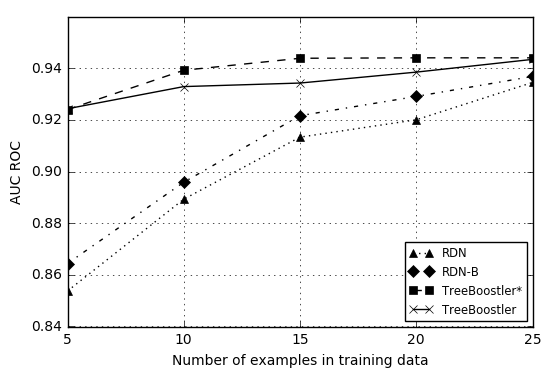

# 2_uwcse_imdb

trRDN-B Rev [0.9959742799999999, 0.9927442000000001, 0.99437812, 0.9951034, 0.99487788]
trRDN-B [1.0, 1.0, 1.0, 1.0, 1.0]
RDN-B [0.96798976, 0.9839548, 0.9867638000000001, 0.9886171600000001, 0.98919]
RDN [0.9376254000000002, 0.94572568, 0.95702768, 0.95186656, 0.9521239600000001]


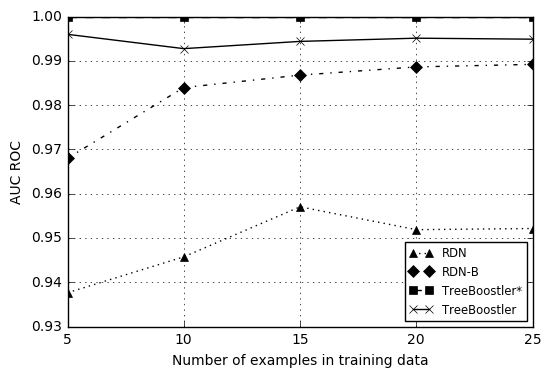

# 7_imdb_cora

trRDN-B Rev [0.4818242, 0.5483201200000001, 0.58034056, 0.6202416399999999, 0.70996544]
trRDN-B [0.48205144000000005, 0.5483201200000001, 0.56039072, 0.5704808800000001, 0.5762380800000001]
RDN-B [0.50499776, 0.5246763999999999, 0.54205408, 0.5790608, 0.7077032400000001]
RDN [0.50499776, 0.50720436, 0.54135708, 0.5598396400000001, 0.62787656]


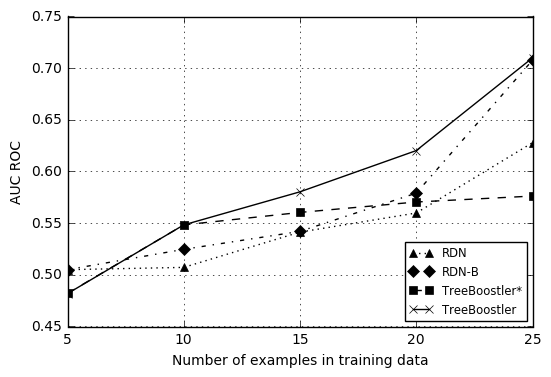

# 15_yeast_twitter

trRDN-B Rev [0.976491, 0.97945525, 0.9863705, 0.99036575, 0.99161175]
trRDN-B [0.9801187499999999, 0.97978225, 0.98571125, 0.9894242499999999, 0.988108]
RDN-B [0.80795075, 0.91711, 0.9499795, 0.97125175, 0.98591375]
RDN [0.799191, 0.88932375, 0.87717775, 0.9292229999999999, 0.967585]


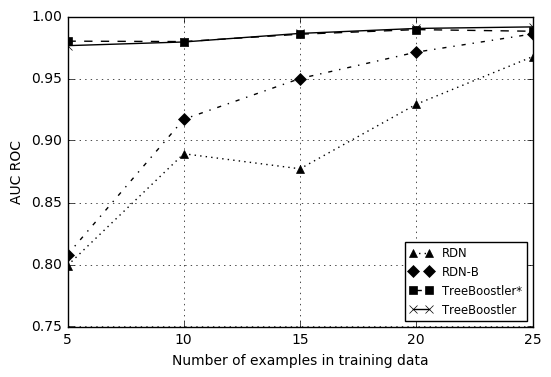

# 22_twitter_yeast

trRDN-B Rev [0.82060075, 0.8893014375000001, 0.934016, 0.929092875, 0.9565265624999999]
trRDN-B [0.8414661875, 0.9039305, 0.947319375, 0.9546313124999999, 0.9713400625]
RDN-B [0.5225039375, 0.5632089375, 0.6229079375, 0.6900211875, 0.766936625]
RDN [0.49998687500000005, 0.5239190625000001, 0.5527938125, 0.6129724999999999, 0.6369104374999999]


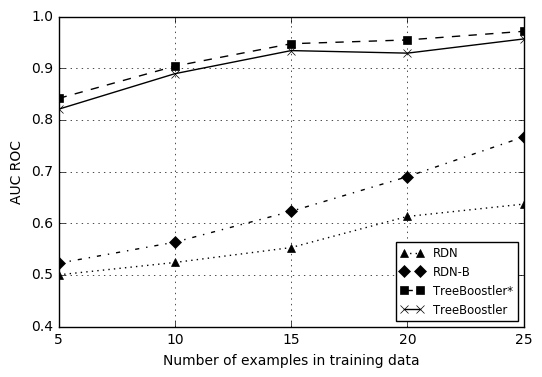

# 37_nell_sports_nell_finances

trRDN-B Rev [0.9700412222222221, 0.9710276666666666, 0.972277111111111, 0.9706002222222222, 0.9704212222222223]
trRDN-B [0.9700412222222221, 0.9688181111111112, 0.9715658888888888, 0.9698094444444444, 0.9724801111111111]
RDN-B [0.49890388888888887, 0.5062872222222222, 0.5522201111111111, 0.5510382222222222, 0.5908017777777778]
RDN [0.49890388888888887, 0.5065204444444444, 0.5221088888888888, 0.5475688888888888, 0.526993111111111]


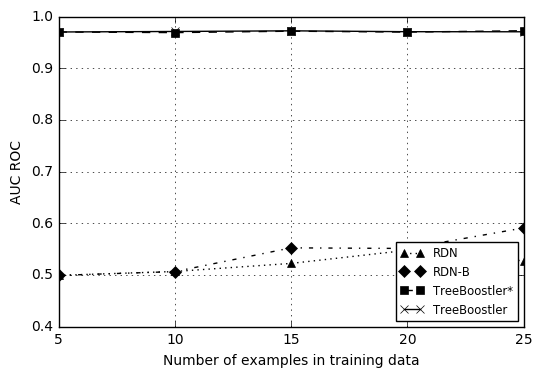

# 46_nell_finances_nell_sports

trRDN-B Rev [0.8841735555555555, 0.9831175555555555, 0.9880424444444444, 0.9880819999999999, 0.9888885555555555]
trRDN-B [0.5317881111111111, 0.5702334444444443, 0.559628888888889, 0.5766640000000001, 0.6147528888888889]
RDN-B [0.9859705555555557, 0.9859705555555557, 0.9856507777777779, 0.985105, 0.98663]
RDN [0.9859705555555557, 0.9859705555555557, 0.985105, 0.985105, 0.98663]


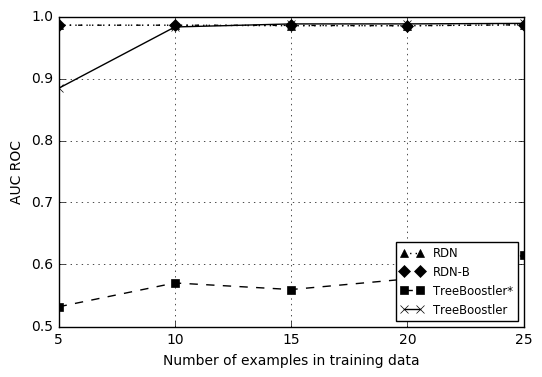

# 53_cora_imdb

trRDN-B Rev [0.9692408800000001, 0.97647432, 0.9912292, 0.9972587200000002, 0.9979563199999999]
trRDN-B [0.9687388800000001, 0.97290548, 0.98176152, 0.9868758000000002, 0.9871762800000001]
RDN-B [0.9376859600000002, 0.9640266000000001, 0.9782830800000001, 0.9869156800000001, 0.9837616400000002]
RDN [0.9311903600000001, 0.9477419599999999, 0.94545868, 0.95228308, 0.9594670800000001]


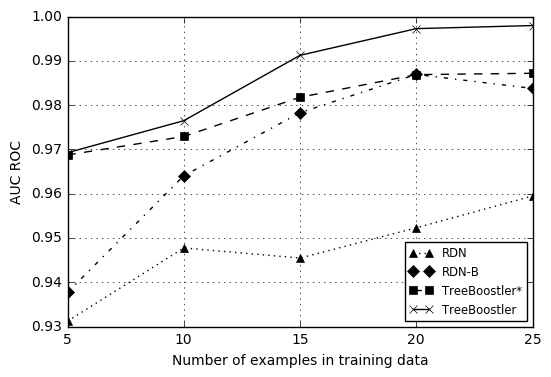

# Results for AUC PR

# 1_imdb_uwcse

trRDN-B Rev [0.28168776, 0.30544736, 0.31304132000000007, 0.34343512, 0.34506571999999996]
trRDN-B [0.28054596000000004, 0.40703688000000005, 0.4497548, 0.45399528, 0.45399528]
RDN-B [0.20538496000000003, 0.25123812, 0.29838448, 0.33029692, 0.34141316]
RDN [0.18848976, 0.2338232, 0.25031844000000003, 0.31841100000000006, 0.31868608000000004]


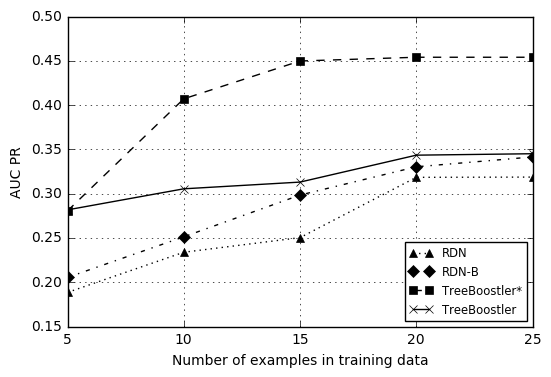

# 2_uwcse_imdb

trRDN-B Rev [0.864682, 0.8125389599999998, 0.86526028, 0.8918580799999999, 0.91369788]
trRDN-B [1.0, 1.0, 1.0, 1.0, 1.0]
RDN-B [0.38996756, 0.6346776000000001, 0.7173704399999999, 0.79019944, 0.81545252]
RDN [0.25638715999999995, 0.24985968000000006, 0.30200931999999997, 0.33239831999999997, 0.36053192]


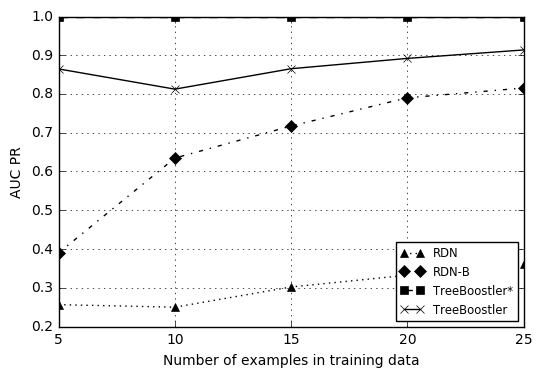

# 7_imdb_cora

trRDN-B Rev [0.06732491999999998, 0.1142582, 0.12904596, 0.19059036000000001, 0.24639271999999995]
trRDN-B [0.06733727999999999, 0.1142582, 0.12093795999999998, 0.13244712, 0.13381959999999998]
RDN-B [0.01226792, 0.029854520000000002, 0.03045572, 0.0667184, 0.1439702]
RDN [0.01226792, 0.01230972, 0.029612359999999997, 0.04317127999999999, 0.0937126]


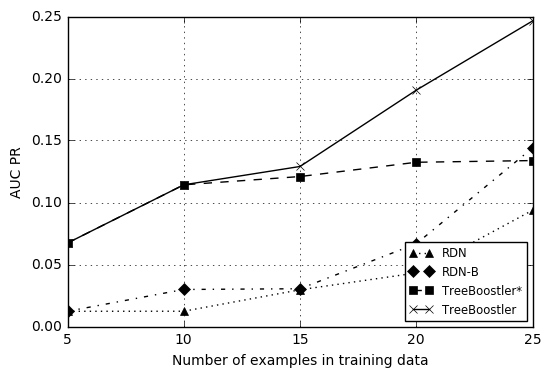

# 15_yeast_twitter

trRDN-B Rev [0.34360875, 0.333348, 0.324899, 0.31042125, 0.292144]
trRDN-B [0.36855950000000004, 0.36706225, 0.35204949999999996, 0.36139924999999995, 0.3612955]
RDN-B [0.23526400000000003, 0.27582625, 0.31168925000000003, 0.28033874999999997, 0.32311824999999994]
RDN [0.23287449999999998, 0.2647355, 0.24919400000000003, 0.29243600000000003, 0.3149155]


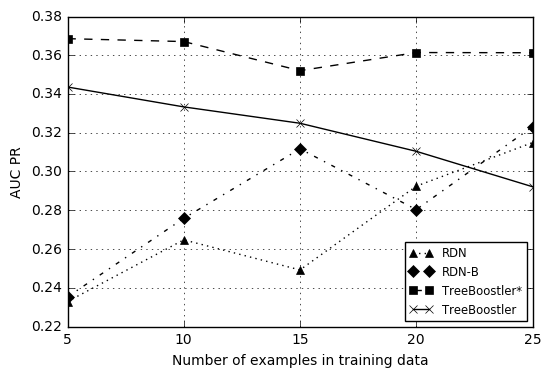

# 22_twitter_yeast

trRDN-B Rev [0.17000718750000002, 0.185755, 0.22071306249999997, 0.23061500000000001, 0.2455174375]
trRDN-B [0.22445143750000002, 0.28623893749999996, 0.2995975, 0.28717281250000004, 0.3189790625]
RDN-B [0.010765250000000002, 0.0330876875, 0.0511018125, 0.0776245625, 0.0881235625]
RDN [0.0072021875, 0.0139059375, 0.0265794375, 0.0265036875, 0.02990925]


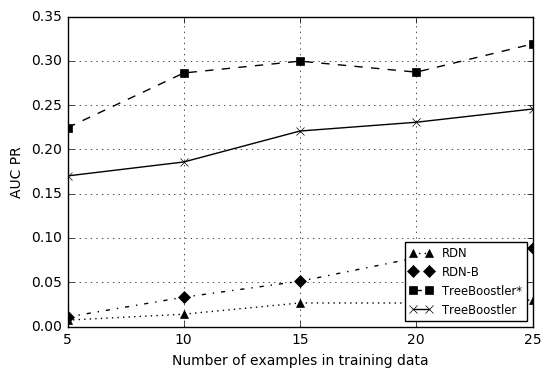

# 37_nell_sports_nell_finances

trRDN-B Rev [0.03770188888888889, 0.03119033333333333, 0.036766, 0.029247444444444447, 0.036096111111111114]
trRDN-B [0.03770188888888889, 0.03230488888888889, 0.046690444444444444, 0.032031, 0.040537]
RDN-B [0.0014098888888888891, 0.0014592222222222222, 0.004686333333333334, 0.004673222222222222, 0.01025922222222222]
RDN [0.0014098888888888891, 0.0014502222222222223, 0.0027025555555555553, 0.004446222222222222, 0.0038179999999999998]


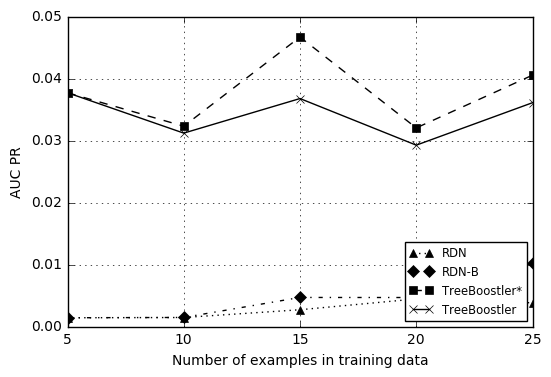

# 46_nell_finances_nell_sports

trRDN-B Rev [0.10931811111111112, 0.13420244444444443, 0.16043577777777782, 0.15489544444444445, 0.16422044444444445]
trRDN-B [0.01286888888888889, 0.01630488888888889, 0.01587166666666667, 0.012048222222222222, 0.02226922222222222]
RDN-B [0.13537177777777779, 0.13537177777777779, 0.1520067777777778, 0.15048333333333333, 0.14625588888888888]
RDN [0.13537177777777779, 0.13537177777777779, 0.15048333333333333, 0.15048333333333333, 0.14625588888888888]


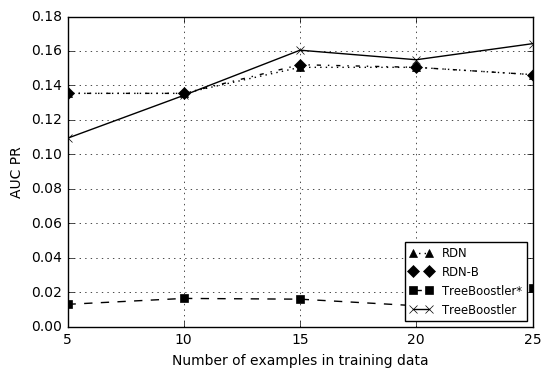

# 53_cora_imdb

trRDN-B Rev [0.7634226400000002, 0.7820028000000001, 0.8935496399999998, 0.9344122, 0.9450835599999999]
trRDN-B [0.77389364, 0.8012388400000001, 0.86842836, 0.9064415199999999, 0.90730256]
RDN-B [0.29093608, 0.5547259999999999, 0.63129608, 0.75321712, 0.74442048]
RDN [0.2185628, 0.25925940000000003, 0.29722331999999996, 0.33559776, 0.41955208000000005]


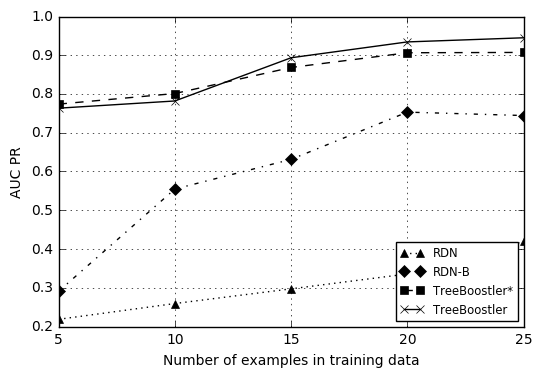

# Results for CLL

# 1_imdb_uwcse

trRDN-B Rev [-0.30506572000000004, -0.29324928, -0.28951804000000003, -0.28904128, -0.28118844]
trRDN-B [-0.29663136, -0.27179788000000005, -0.26970952, -0.27070864, -0.26995327999999996]
RDN-B [-0.42634956000000007, -0.36912520000000004, -0.33205124, -0.30667708000000005, -0.29504663999999997]
RDN [-0.22794532000000003, -0.22207780000000002, -0.21852036000000002, -0.21609743999999997, -0.21415264]


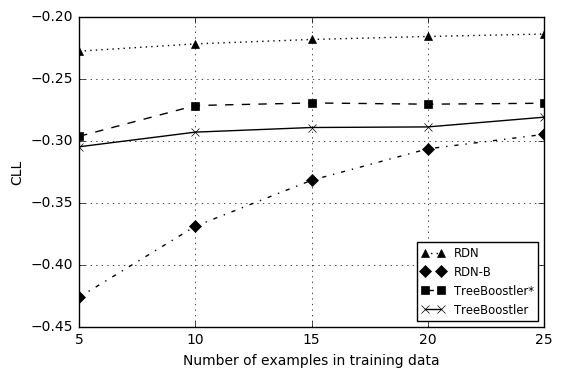

# 2_uwcse_imdb

trRDN-B Rev [-0.09136636000000001, -0.10209792000000002, -0.09871339999999999, -0.0943408, -0.0923244]
trRDN-B [-0.07721971999999999, -0.07565984, -0.07461219999999999, -0.0743474, -0.0741934]
RDN-B [-0.20942051999999997, -0.1701046, -0.15593584, -0.14486667999999997, -0.14475455999999998]
RDN [-0.18127988, -0.18202084, -0.17897996, -0.18021271999999997, -0.1798918]


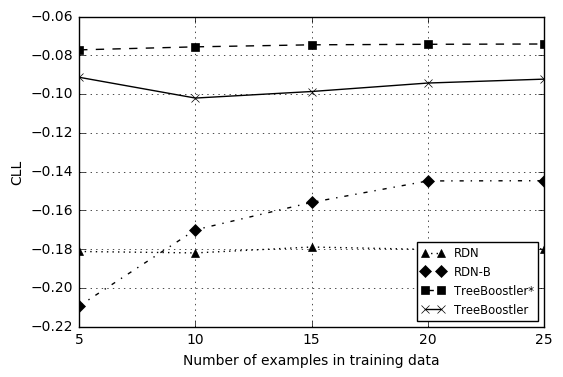

# 7_imdb_cora

trRDN-B Rev [-0.5987869600000001, -0.5916528, -0.5592127600000001, -0.5394358, -0.45669551999999997]
trRDN-B [-0.6031778400000001, -0.5916528, -0.5790765600000001, -0.57339772, -0.5689495599999999]
RDN-B [-0.25390752, -0.30839355999999996, -0.46058728000000004, -0.4907593199999999, -0.44380008000000004]
RDN [-0.18411244, -0.19298952000000003, -0.20882128000000005, -0.21275383999999997, -0.20848304]


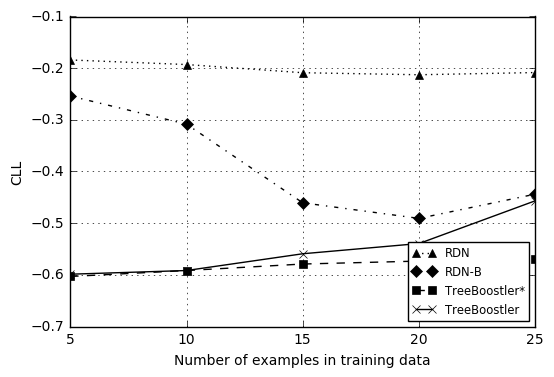

# 15_yeast_twitter

trRDN-B Rev [-0.17319675, -0.16425525, -0.16406525, -0.17927875000000001, -0.1589505]
trRDN-B [-0.16165300000000002, -0.17888774999999998, -0.1764865, -0.18174375, -0.189222]
RDN-B [-0.328438, -0.2208555, -0.21446025, -0.21396825, -0.178973]
RDN [-0.1790835, -0.16827725, -0.17752825, -0.16654975, -0.16175875]


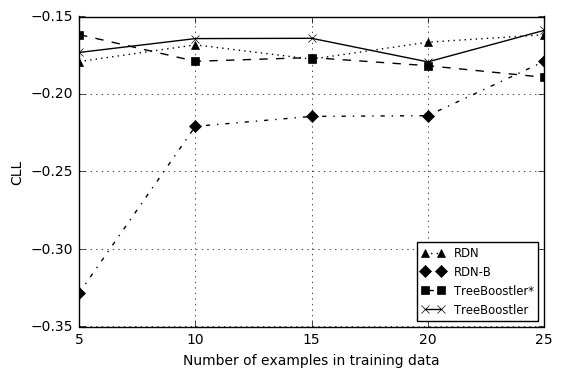

# 22_twitter_yeast

trRDN-B Rev [-0.2906466875, -0.30045925, -0.2759825625, -0.322732125, -0.2864295625]
trRDN-B [-0.2180345625, -0.24568656249999998, -0.2333945, -0.2603681875, -0.24433425]
RDN-B [-0.743998875, -0.707785, -0.621961625, -0.631212875, -0.503488625]
RDN [-0.22804193749999996, -0.23059075, -0.218513625, -0.21819143749999997, -0.21541525]


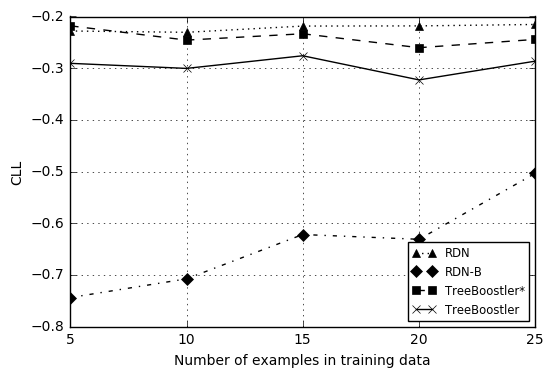

# 37_nell_sports_nell_finances

trRDN-B Rev [-0.14753877777777777, -0.18040688888888887, -0.174369, -0.1815543333333333, -0.18435955555555553]
trRDN-B [-0.14753877777777777, -0.1782204444444445, -0.1726871111111111, -0.17961255555555555, -0.18119200000000002]
RDN-B [-0.5375503333333334, -0.6850695555555556, -0.6716815555555554, -0.7036602222222222, -0.6735691111111111]
RDN [-0.2026198888888889, -0.21721711111111108, -0.21612399999999998, -0.213623, -0.219371]


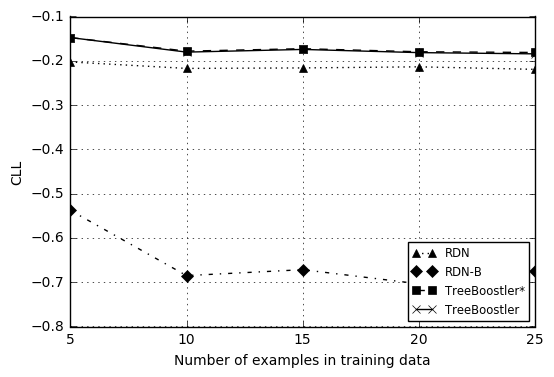

# 46_nell_finances_nell_sports

trRDN-B Rev [-0.34714033333333333, -0.16521455555555556, -0.13854811111111112, -0.11604133333333333, -0.10893922222222223]
trRDN-B [-0.6755226666666666, -0.6489900000000001, -0.6285846666666667, -0.6277557777777778, -0.6179072222222222]
RDN-B [-0.09612466666666665, -0.09612466666666665, -0.09338044444444445, -0.09283033333333333, -0.09340877777777777]
RDN [-0.14004877777777777, -0.14004877777777777, -0.139742, -0.139742, -0.13979211111111112]


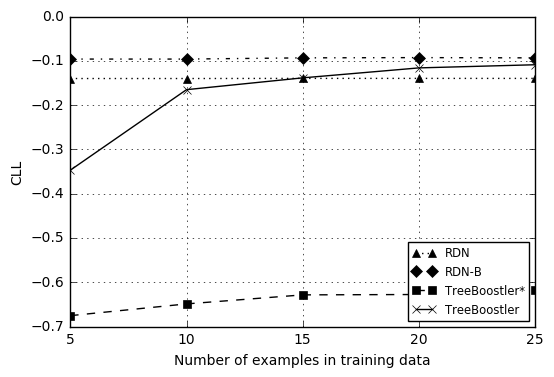

# 53_cora_imdb

trRDN-B Rev [-0.29385084, -0.2020566, -0.12503148, -0.10975196000000001, -0.09280984]
trRDN-B [-0.3202916, -0.28263356, -0.24859776, -0.24631203999999998, -0.24285631999999996]
RDN-B [-0.32358711999999995, -0.23717760000000002, -0.19160423999999998, -0.16998424, -0.16863212]
RDN [-0.1884984, -0.18252488, -0.18315464, -0.18004208000000002, -0.17737576]


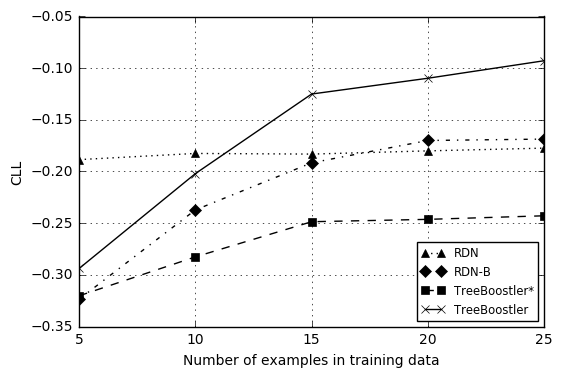

In [3]:
for metric in ['AUC ROC', 'AUC PR', 'CLL']:
    display(Markdown('# Results for ' + metric))
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data['results']:
            display(Markdown('# ' + dataset))
            transfer_p = []
            parameter_p = []
            rdn_p = []
            rdn_b_p = []
            for amount in [5,10,15,20,25]:
                #for metric in ['AUC ROC', 'AUC PR']:
                    #display(Markdown('## ' + metric))
                mapping_time = ''
                if metric == 'Precision':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                elif metric == 'Learning and Revision time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping = np.array([(np.array([item['transfer']['Mapping results']['Total time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping_time = ' (%.1f)' % mapping.mean()
                elif metric == 'Inference time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                else:
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                table.append([dataset, '%.3f +/- %.3f' % (parameter.mean(), 2 * parameter.std()),
                '%.3f +/- %.3f' % (transfer.mean(), 2 * transfer.std()),
                '%.3f +/- %.3f' % (scratch.mean(), 2 * scratch.std()),
                '%.3f +/- %.3f' % (scratch_rdn.mean(), 2 * scratch_rdn.std())])
                 #             ])
                transfer_p.append(transfer.mean())
                parameter_p.append(parameter.mean())
                rdn_b_p.append(scratch.mean())
                rdn_p.append(scratch_rdn.mean())

            print('trRDN-B Rev %s' % transfer_p)
            print('trRDN-B %s' % parameter_p)
            print('RDN-B %s' % rdn_b_p)
            print('RDN %s' % rdn_p)
            t = [5,10,15,20,25]
            fig, ax = plt.subplots()
            ax.plot(t, rdn_p, '^-', linestyle=':', color='k', label='RDN')
            ax.plot(t, rdn_b_p, 'D-', linestyle='-.', color='k', label='RDN-B')
            ax.plot(t, parameter_p, 's-', linestyle='--', color='k', label='TreeBoostler*')
            ax.plot(t, transfer_p, 'x-', linestyle='-', color='k', label='TreeBoostler')

            ax.set(xlabel='Number of examples in training data', ylabel=metric,
                   )
            ax.set_xticks([5,10,15,20,25])
            ax.grid(linestyle = ':')
            ax.legend(loc='lower right', fontsize='small', frameon=True)
            plt.show()